In [1]:
import os
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from skimage.feature import hog

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
digits_dataset_path = "digits_updated/"

In [3]:
images = []
labels = []

for label in range(10):
    folder_path = os.path.join(digits_dataset_path, str(label))
    
    for file in os.listdir(folder_path):
        if file.endswith(".png"):
            img_path = os.path.join(folder_path, file)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (64, 64))
            images.append(image)
            labels.append(label)

images = np.array(images)
labels = np.array(labels)

In [8]:
labels

array([0, 0, 0, ..., 9, 9, 9])

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

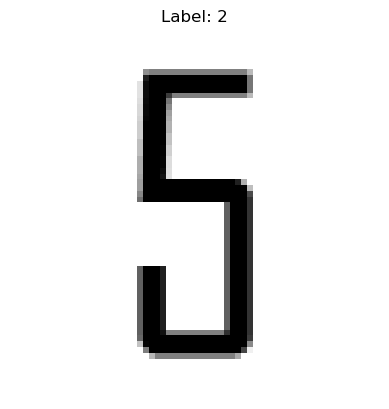

In [109]:
index = np.where(labels == 5)[0][0]
plt.imshow(images[index], cmap='gray')
plt.title("Label: 2")
plt.axis('off')

In [110]:
hog_features = []

for image in images:
    features = hog(
        image,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys'
    )
    hog_features.append(features)

hog_features = np.array(hog_features)

In [111]:
features_train, features_test, label_train, label_test = train_test_split(hog_features,labels,test_size=0.2, random_state=3)
print(hog_features.shape,features_train.shape,features_test.shape)
print(labels.shape,label_train.shape,label_test.shape)

(10160, 1764) (8128, 1764) (2032, 1764)
(10160,) (8128,) (2032,)


In [112]:
scaler = StandardScaler()

In [113]:
features_train = scaler.fit_transform(features_train)

In [114]:
features_test = scaler.transform(features_test)

In [115]:
all_models = {
    "LogisticRegression":LogisticRegression(
        C=1.0,
        penalty='l2',
        solver='lbfgs',
        max_iter=1000
    ),
    "XGBClassifier":XGBClassifier(
        objective="multi:softmax",
        num_class=10,
        eval_metric="mlogloss",
        random_state=42
    ),
    "DecisionTreeClassifier":DecisionTreeClassifier(
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5
    ),
    "RandomForestClassifier":RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        n_jobs=-1
    ),
    "SVC":SVC(kernel='linear',C=1)
}

In [116]:
for model_name, model in all_models.items():
    model.fit(features_train,label_train)
    print(f"{model_name} training done!!!")

LogisticRegression training done!!!
XGBClassifier training done!!!
DecisionTreeClassifier training done!!!
RandomForestClassifier training done!!!
SVC training done!!!


In [117]:
for model_name, model in all_models.items():
    training_prediction = model.predict(features_train)
    training_accuracy = accuracy_score(training_prediction,label_train)
    print(f"Accuracy of training data on {model_name} is {training_accuracy}")

Accuracy of training data on LogisticRegression is 1.0
Accuracy of training data on XGBClassifier is 1.0
Accuracy of training data on DecisionTreeClassifier is 0.9432824803149606
Accuracy of training data on RandomForestClassifier is 1.0
Accuracy of training data on SVC is 1.0


In [118]:
for model_name, model in all_models.items():
    testing_prediction = model.predict(features_test)
    testing_accuracy = accuracy_score(testing_prediction,label_test)
    print(f"Accuracy of testing data on {model_name} is {testing_accuracy}")

Accuracy of testing data on LogisticRegression is 0.9936023622047244
Accuracy of testing data on XGBClassifier is 0.9896653543307087
Accuracy of testing data on DecisionTreeClassifier is 0.9143700787401575
Accuracy of testing data on RandomForestClassifier is 0.9926181102362205
Accuracy of testing data on SVC is 0.9960629921259843


In [119]:
def predict_digit(image_path, model, scaler):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Invalid image path")
    image = cv2.resize(image, (64, 64))
    hog_feature = hog(
        image,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys'
    )
    hog_feature = hog_feature.reshape(1, -1)
    hog_feature = scaler.transform(hog_feature)
    prediction = model.predict(hog_feature)
    return prediction[0]

In [121]:
image_path = [
    "E:/Jupyter Notebook/ML Mini Projects/Handwritten Digit Prediction/digits_updated/0/img001-00210.png",
    "E:/Jupyter Notebook/ML Mini Projects/Handwritten Digit Prediction/digits_updated/1/img002-00211.png",
    "E:/Jupyter Notebook/ML Mini Projects/Handwritten Digit Prediction/digits_updated/2/img003-00212.png",
    "E:/Jupyter Notebook/ML Mini Projects/Handwritten Digit Prediction/digits_updated/3/img004-00213.png",
    "E:/Jupyter Notebook/ML Mini Projects/Handwritten Digit Prediction/digits_updated/4/img005-00214.png",
    "E:/Jupyter Notebook/ML Mini Projects/Handwritten Digit Prediction/digits_updated/5/img006-00215.png",
    "E:/Jupyter Notebook/ML Mini Projects/Handwritten Digit Prediction/digits_updated/6/img007-00216.png",
    "E:/Jupyter Notebook/ML Mini Projects/Handwritten Digit Prediction/digits_updated/7/img008-00217.png",
    "E:/Jupyter Notebook/ML Mini Projects/Handwritten Digit Prediction/digits_updated/8/img009-00218.png",
    "E:/Jupyter Notebook/ML Mini Projects/Handwritten Digit Prediction/digits_updated/9/img010-00219.png"
]

for path in image_path:
    for model_name, model in all_models.items():
        pred = predict_digit(path, model, scaler)
        print(f"{model_name} is predicting  {pred}")
    print("-"*50)

LogisticRegression is predicting  0
XGBClassifier is predicting  0
DecisionTreeClassifier is predicting  0
RandomForestClassifier is predicting  0
SVC is predicting  0
--------------------------------------------------
LogisticRegression is predicting  1
XGBClassifier is predicting  1
DecisionTreeClassifier is predicting  1
RandomForestClassifier is predicting  1
SVC is predicting  1
--------------------------------------------------
LogisticRegression is predicting  2
XGBClassifier is predicting  2
DecisionTreeClassifier is predicting  2
RandomForestClassifier is predicting  2
SVC is predicting  2
--------------------------------------------------
LogisticRegression is predicting  3
XGBClassifier is predicting  3
DecisionTreeClassifier is predicting  3
RandomForestClassifier is predicting  3
SVC is predicting  3
--------------------------------------------------
LogisticRegression is predicting  4
XGBClassifier is predicting  4
DecisionTreeClassifier is predicting  4
RandomForestClass